In [50]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from src.definitions import ROOT_DIR
from src.definitions import KEYS_TO_LITHOLOGY

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
plt.style.use('seaborn-poster')

# Load train data

In [3]:
train_path = ROOT_DIR / 'data/external' / 'CSV_train.csv'

assert train_path.is_file()

In [4]:
train = pd.read_csv(train_path, sep=';')

# Load test data

In [5]:
test_path = ROOT_DIR / 'data/external' / 'CSV_test.csv'

assert test_path.is_file()

In [6]:
test = pd.read_csv(test_path, sep=';')

# Wells head coordinates

Based on Brendon Hall's
https://github.com/brendonhall/FORCE-2020-Lithology/blob/master/notebooks/02-Map-View.ipynb

In [7]:
from src.data.download_data import download_well_meta

In [8]:
output_root = ROOT_DIR / 'data/external'
well_meta_path = output_root / 'well_meta_npd.csv'

In [9]:
if not well_meta_path.is_file():
    download_well_meta()

In [10]:
well_meta = pd.read_csv(well_meta_path)

In [11]:
well_meta.head()

,wlbWellboreName,wlbWell,wlbDrillingOperator,wlbProductionLicence,wlbPurpose,wlbStatus,wlbContent,wlbWellType,wlbSubSea,wlbEntryDate,...,wlbNpdidWellbore,dscNpdidDiscovery,fldNpdidField,fclNpdidFacilityDrilling,wlbNpdidWellboreReclass,prlNpdidProductionLicence,wlbNpdidSiteSurvey,wlbDateUpdated,wlbDateUpdatedMax,datesyncNPD
0,1/2-1,1/2-1,Phillips Petroleum Norsk AS,143,WILDCAT,P&A,OIL,EXPLORATION,NO,20.03.1989,...,1382,43814.0,3437650.0,296245.0,0,21956.0,NaN,13.01.2021,15.12.2020,14.01.2021
1,1/2-2,1/2-2,Paladin Resources Norge AS,143 CS,WILDCAT,P&A,OIL SHOWS,EXPLORATION,NO,14.12.2005,...,5192,NaN,NaN,278245.0,0,2424919.0,NaN,13.01.2021,03.10.2019,14.01.2021
2,1/3-1,1/3-1,A/S Norske Shell,011,WILDCAT,P&A,GAS,EXPLORATION,NO,06.07.1968,...,154,43820.0,NaN,288604.0,0,20844.0,NaN,13.01.2021,10.03.2020,14.01.2021
3,1/3-2,1/3-2,A/S Norske Shell,011,WILDCAT,P&A,DRY,EXPLORATION,NO,14.05.1969,...,165,NaN,NaN,288847.0,0,20844.0,NaN,13.01.2021,10.03.2020,14.01.2021
4,1/3-3,1/3-3,Elf Petroleum Norge AS,065,WILDCAT,P&A,OIL,EXPLORATION,NO,22.08.1982,...,87,43826.0,1028599.0,288334.0,0,21316.0,NaN,13.01.2021,15.12.2020,14.01.2021


In [12]:
well_meta.shape

(1965, 87)

In [13]:
well_meta.columns

Index(['wlbWellboreName', 'wlbWell', 'wlbDrillingOperator',
       'wlbProductionLicence', 'wlbPurpose', 'wlbStatus', 'wlbContent',
       'wlbWellType', 'wlbSubSea', 'wlbEntryDate', 'wlbCompletionDate',
       'wlbField', 'wlbDrillPermit', 'wlbDiscovery', 'wlbDiscoveryWellbore',
       'wlbBottomHoleTemperature', 'wlbSiteSurvey', 'wlbSeismicLocation',
       'wlbMaxInclation', 'wlbKellyBushElevation', 'wlbFinalVerticalDepth',
       'wlbTotalDepth', 'wlbWaterDepth', 'wlbKickOffPoint', 'wlbAgeAtTd',
       'wlbFormationAtTd', 'wlbMainArea', 'wlbDrillingFacility',
       'wlbFacilityTypeDrilling', 'wlbDrillingFacilityFixedOrMoveable',
       'wlbLicensingActivity', 'wlbMultilateral', 'wlbPurposePlanned',
       'wlbEntryYear', 'wlbCompletionYear', 'wlbReclassFromWellbore',
       'wlbReentryExplorationActivity', 'wlbPlotSymbol', 'wlbFormationWithHc1',
       'wlbAgeWithHc1', 'wlbFormationWithHc2', 'wlbAgeWithHc2',
       'wlbFormationWithHc3', 'wlbAgeWithHc3', 'wlbDrillingDays', 'wlbRee

In [14]:
cols = [
    'wlbWell',
    'wlbNsDecDeg',
    'wlbEwDesDeg',
    'wlbBottomHoleTemperature',
    'wlbMaxInclation',
    'wlbKellyBushElevation',
    'wlbTotalDepth',
    'wlbWaterDepth'
]

In [15]:
well_head = well_meta.loc[:, cols].drop_duplicates(subset='wlbWell')

In [16]:
well_head.shape

(1598, 8)

In [17]:
well_head.isna().sum()

wlbWell                      0
wlbNsDecDeg                  0
wlbEwDesDeg                  0
wlbBottomHoleTemperature    95
wlbMaxInclation             95
wlbKellyBushElevation        0
wlbTotalDepth               23
wlbWaterDepth                0
dtype: int64

In [18]:
well_head.sample(10)

,wlbWell,wlbNsDecDeg,wlbEwDesDeg,wlbBottomHoleTemperature,wlbMaxInclation,wlbKellyBushElevation,wlbTotalDepth,wlbWaterDepth
582,24/9-2,59.270119,1.920072,69.0,0.00,26.0,2743.0,118.0
879,30/7-3,60.285900,2.248456,119.0,2.75,24.0,4044.0,99.5
1443,6405/12-1,64.195044,5.870194,0.0,1.10,25.0,3330.0,420.0
1363,35/11-8,61.090425,3.537458,128.0,33.00,26.0,3624.0,361.0
579,24/6-3,59.579047,1.913181,0.0,0.00,23.0,253.0,121.0
1367,35/11-11,61.108728,3.563633,115.0,3.50,23.5,3225.0,359.0
724,25/8-10,59.272969,2.535111,83.0,10.40,25.0,1890.0,129.0
532,16/5-5,58.640511,2.348456,0.0,1.00,25.0,2085.0,100.0
1908,7220/11-3,72.020172,20.528119,0.0,7.90,30.0,1922.5,397.0
1645,6507/5-5,65.702225,7.595933,155.0,6.60,18.0,3948.0,375.0


# Get well head name function

In [41]:
for well_name, curves in train.groupby('WELL'):
    
    # Extract well head name
    well_head_name, *_ = well_name.split()
    
    # Get water bottom depth
    cond = well_head['wlbWell'] == well_head_name
    water_depth = well_head.loc[cond, 'wlbWaterDepth'].values[0]
    
    train.loc[curves.index, 'DEPTH_MUDLINE'] = curves['Z_LOC'] - water_depth

In [54]:
test_data = train.loc[train['WELL'] == '15/9-13', :]

In [55]:
test_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,DEPTH_MUDLINE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,-550.501831
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,-550.653809
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,-550.805786
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,-550.957794
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,-551.109772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,8.585064,...,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0,-3326.549316
18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,8.142556,...,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0,-3326.700928
18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,7.933336,...,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0,-3326.852539
18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,7.837981,...,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0,-3327.004395


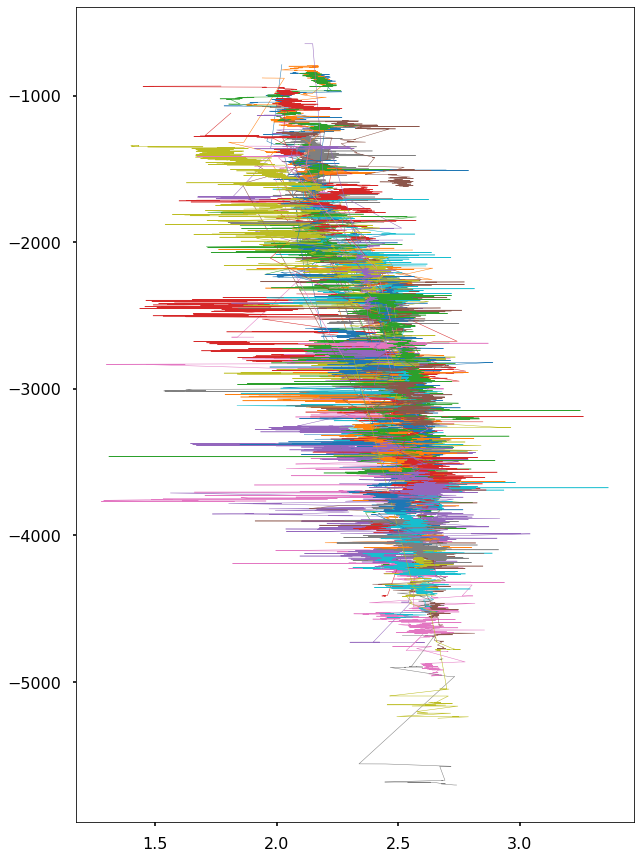

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

for well_name, curves in train.groupby('WELL'):
    cond = curves['GR'] > 110
    curves = curves.loc[cond, :]
    
    x = curves['RHOB']
    y = curves['DEPTH_MUDLINE']

    plt.plot(x, y, linewidth=0.5)